In [122]:
# Load the Company Bankruptcy training Data 

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Comment this if the data visualisations doesn't work on your side
#%matplotlib inline

#plt.style.use('bmh')

# Load the raining set and peek into the data 
train_data = pd.read_csv('company-bankruptcy-pred.csv', error_bad_lines=False, warn_bad_lines=False)

train_data.head()


Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [51]:
train_data.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [53]:
# Let's see any non nulls etc
train_data.isnull().any()
train_data[train_data.isna().any(axis=1)]

Empty DataFrame
Columns: [Bankrupt?,  ROA(C) before interest and depreciation before interest,  ROA(A) before interest and % after tax,  ROA(B) before interest and depreciation after tax,  Operating Gross Margin,  Realized Sales Gross Margin,  Operating Profit Rate,  Pre-tax net Interest Rate,  After-tax net Interest Rate,  Non-industry income and expenditure/revenue,  Continuous interest rate (after tax),  Operating Expense Rate,  Research and development expense rate,  Cash flow rate,  Interest-bearing debt interest rate,  Tax rate (A),  Net Value Per Share (B),  Net Value Per Share (A),  Net Value Per Share (C),  Persistent EPS in the Last Four Seasons,  Cash Flow Per Share,  Revenue Per Share (Yuan ¥),  Operating Profit Per Share (Yuan ¥),  Per Share Net profit before tax (Yuan ¥),  Realized Sales Gross Profit Growth Rate,  Operating Profit Growth Rate,  After-tax Net Profit Growth Rate,  Regular Net Profit Growth Rate,  Continuous Net Profit Growth Rate,  Total Asset Growth Rate,  Net Value Growth Rate,  Total Asset Return Growth Rate Ratio,  Cash Reinvestment %,  Current Ratio,  Quick Ratio,  Interest Expense Ratio,  Total debt/Total net worth,  Debt ratio %,  Net worth/Assets,  Long-term fund suitability ratio (A),  Borrowing dependency,  Contingent liabilities/Net worth,  Operating profit/Paid-in capital,  Net profit before tax/Paid-in capital,  Inventory and accounts receivable/Net value,  Total Asset Turnover,  Accounts Receivable Turnover,  Average Collection Days,  Inventory Turnover Rate (times),  Fixed Assets Turnover Frequency,  Net Worth Turnover Rate (times),  Revenue per person,  Operating profit per person,  Allocation rate per person,  Working Capital to Total Assets,  Quick Assets/Total Assets,  Current Assets/Total Assets,  Cash/Total Assets,  Quick Assets/Current Liability,  Cash/Current Liability,  Current Liability to Assets,  Operating Funds to Liability,  Inventory/Working Capital,  Inventory/Current Liability,  Current Liabilities/Liability,  Working Capital/Equity,  Current Liabilities/Equity,  Long-term Liability to Current Assets,  Retained Earnings to Total Assets,  Total income/Total expense,  Total expense/Assets,  Current Asset Turnover Rate,  Quick Asset Turnover Rate,  Working capitcal Turnover Rate,  Cash Turnover Rate,  Cash Flow to Sales,  Fixed Assets to Assets,  Current Liability to Liability,  Current Liability to Equity,  Equity to Long-term Liability,  Cash Flow to Total Assets,  Cash Flow to Liability,  CFO to Assets,  Cash Flow to Equity,  Current Liability to Current Assets,  Liability-Assets Flag,  Net Income to Total Assets,  Total assets to GNP price,  No-credit Interval,  Gross Profit to Sales,  Net Income to Stockholder's Equity,  Liability to Equity,  Degree of Financial Leverage (DFL),  Interest Coverage Ratio (Interest expense to EBIT),  Net Income Flag,  Equity to Liability]
Index: []

[0 rows x 96 columns]

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

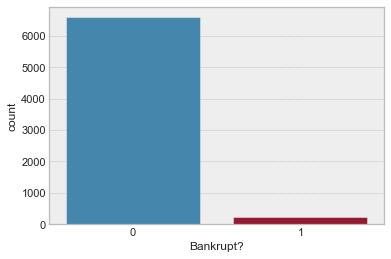

In [54]:
# Let's Ana;yze target value, is BankRupt or not, "BankRupt?" column 

sns.countplot('Bankrupt?',data=train_data)


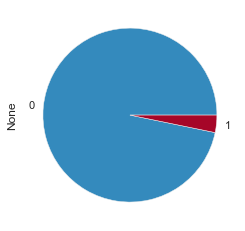

In [55]:
# Pie Plot of "BankRupt?" column 
train_data.groupby('Bankrupt?').size().plot(kind = 'pie') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

As we can see the data is heavily biased, which is normal for this kind of business use case.
What this means is that, very few companies go bankrupt, which is a healthy economic indicator.

In [57]:
# Let's see Box Plots of the features, non scaled 
train_data.plot(kind='box',subplots=True, layout=(10,10), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(150,150)})
plt.show()


Box PLot shows, there are a bunch of outliers, so feature scaling would be Good.

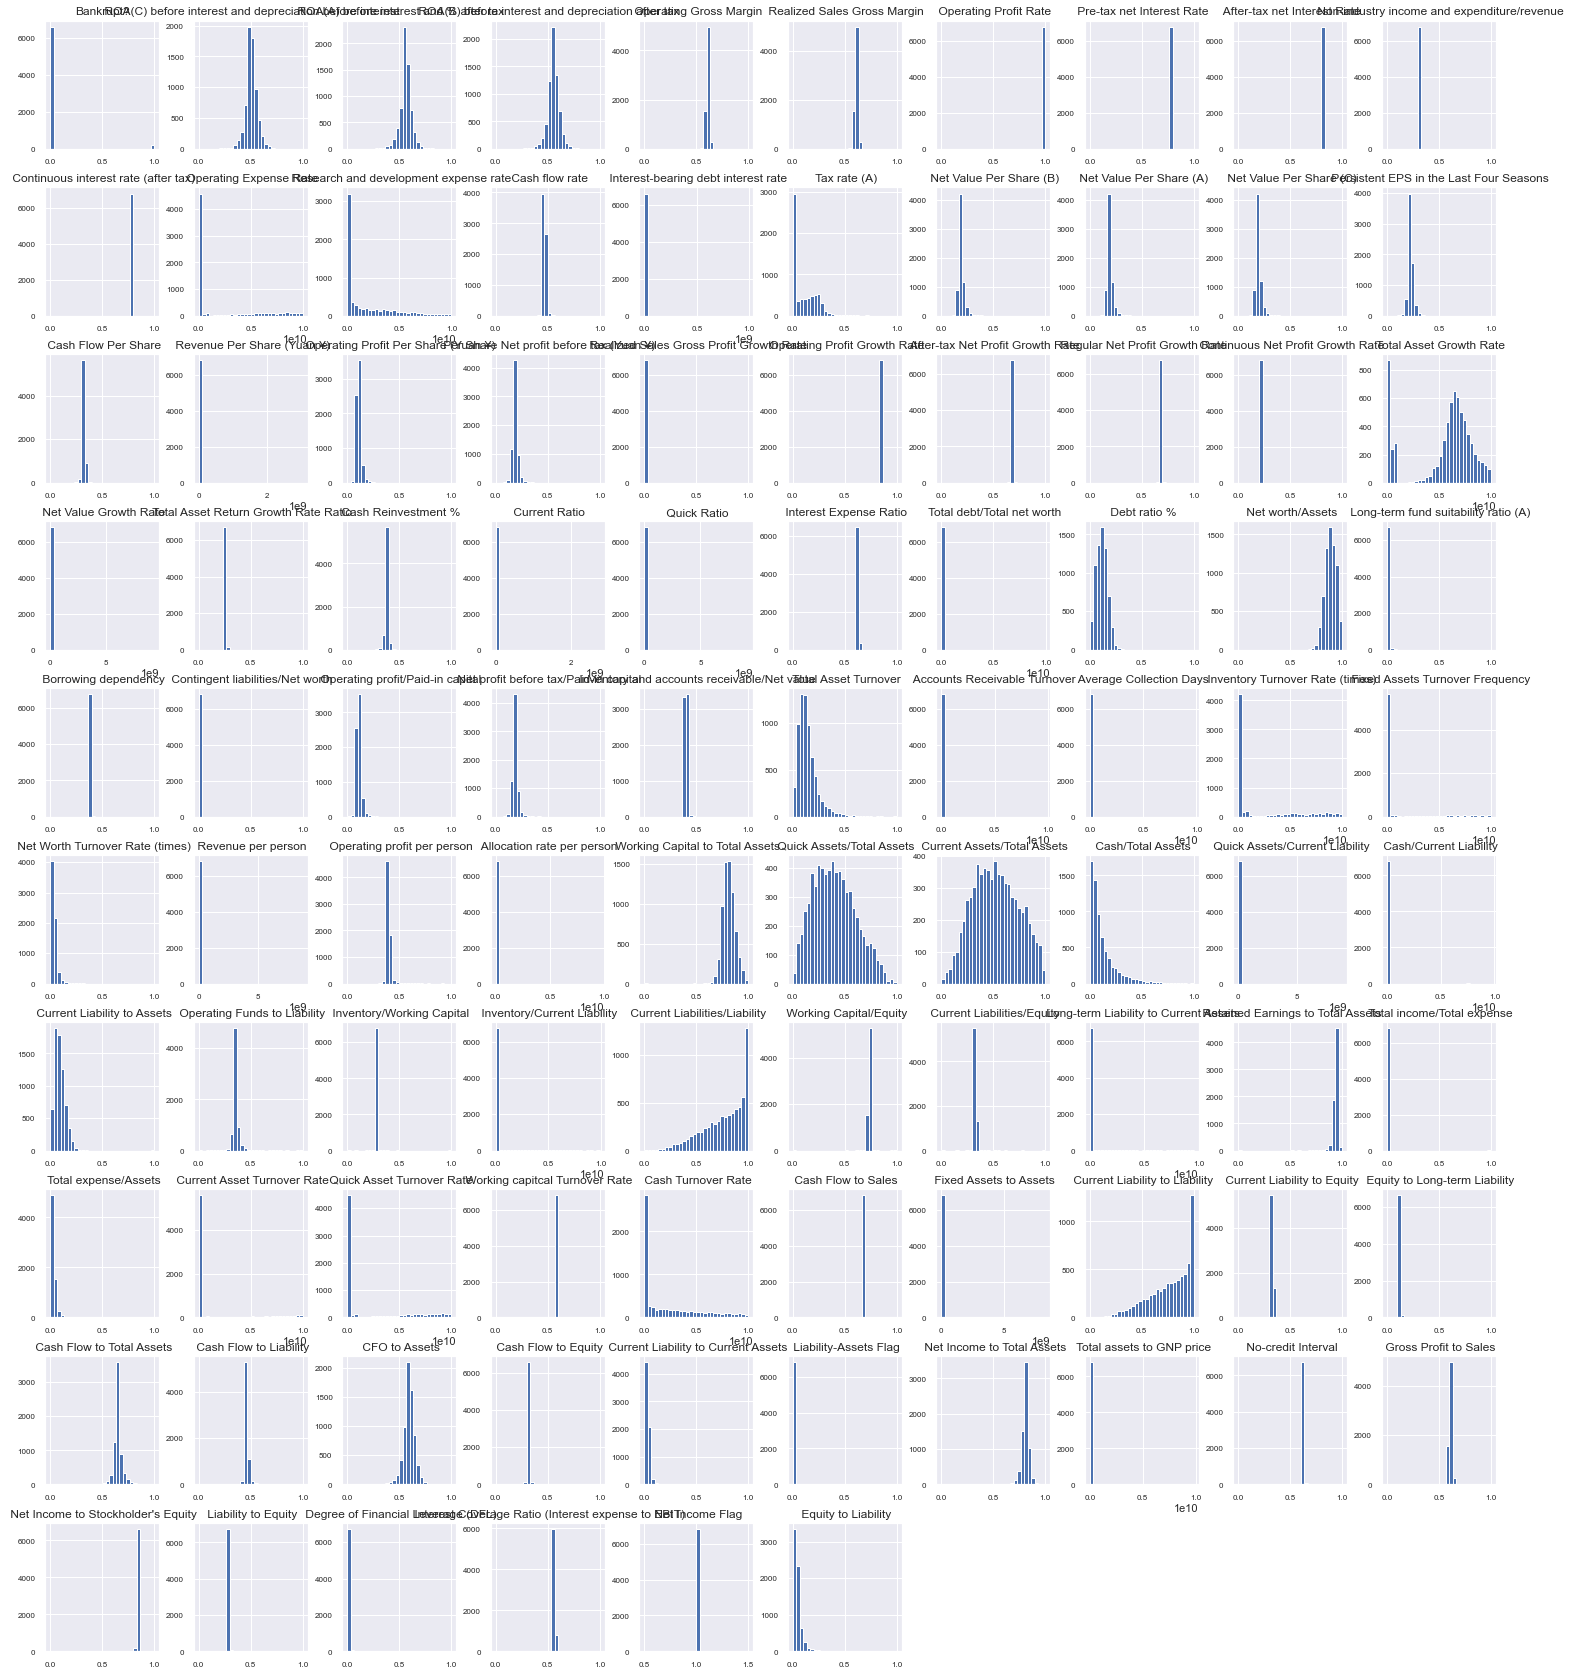

In [177]:
# Histogram of features
#train_data.hist(figsize=(50, 50), bins=50, xlabelsize=8, ylabelsize=8); 
train_data.hist(figsize=(26, 30), bins=30, xlabelsize=8, ylabelsize=8); 

In [59]:
# Correlation Matrix with target value

cor_matrix = train_data.corr().abs()   
cor_matrix.style.background_gradient(sns.light_palette('green', as_cmap=True))


Some features show High correlation, which is a good thing!

In [119]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


random_st = 1234

#defining features and target variable
x = train_data.drop('Bankrupt?', axis=1)
y = train_data['Bankrupt?']

# Scale or Normalize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split Scaled data into Train and Test sets 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=random_st)



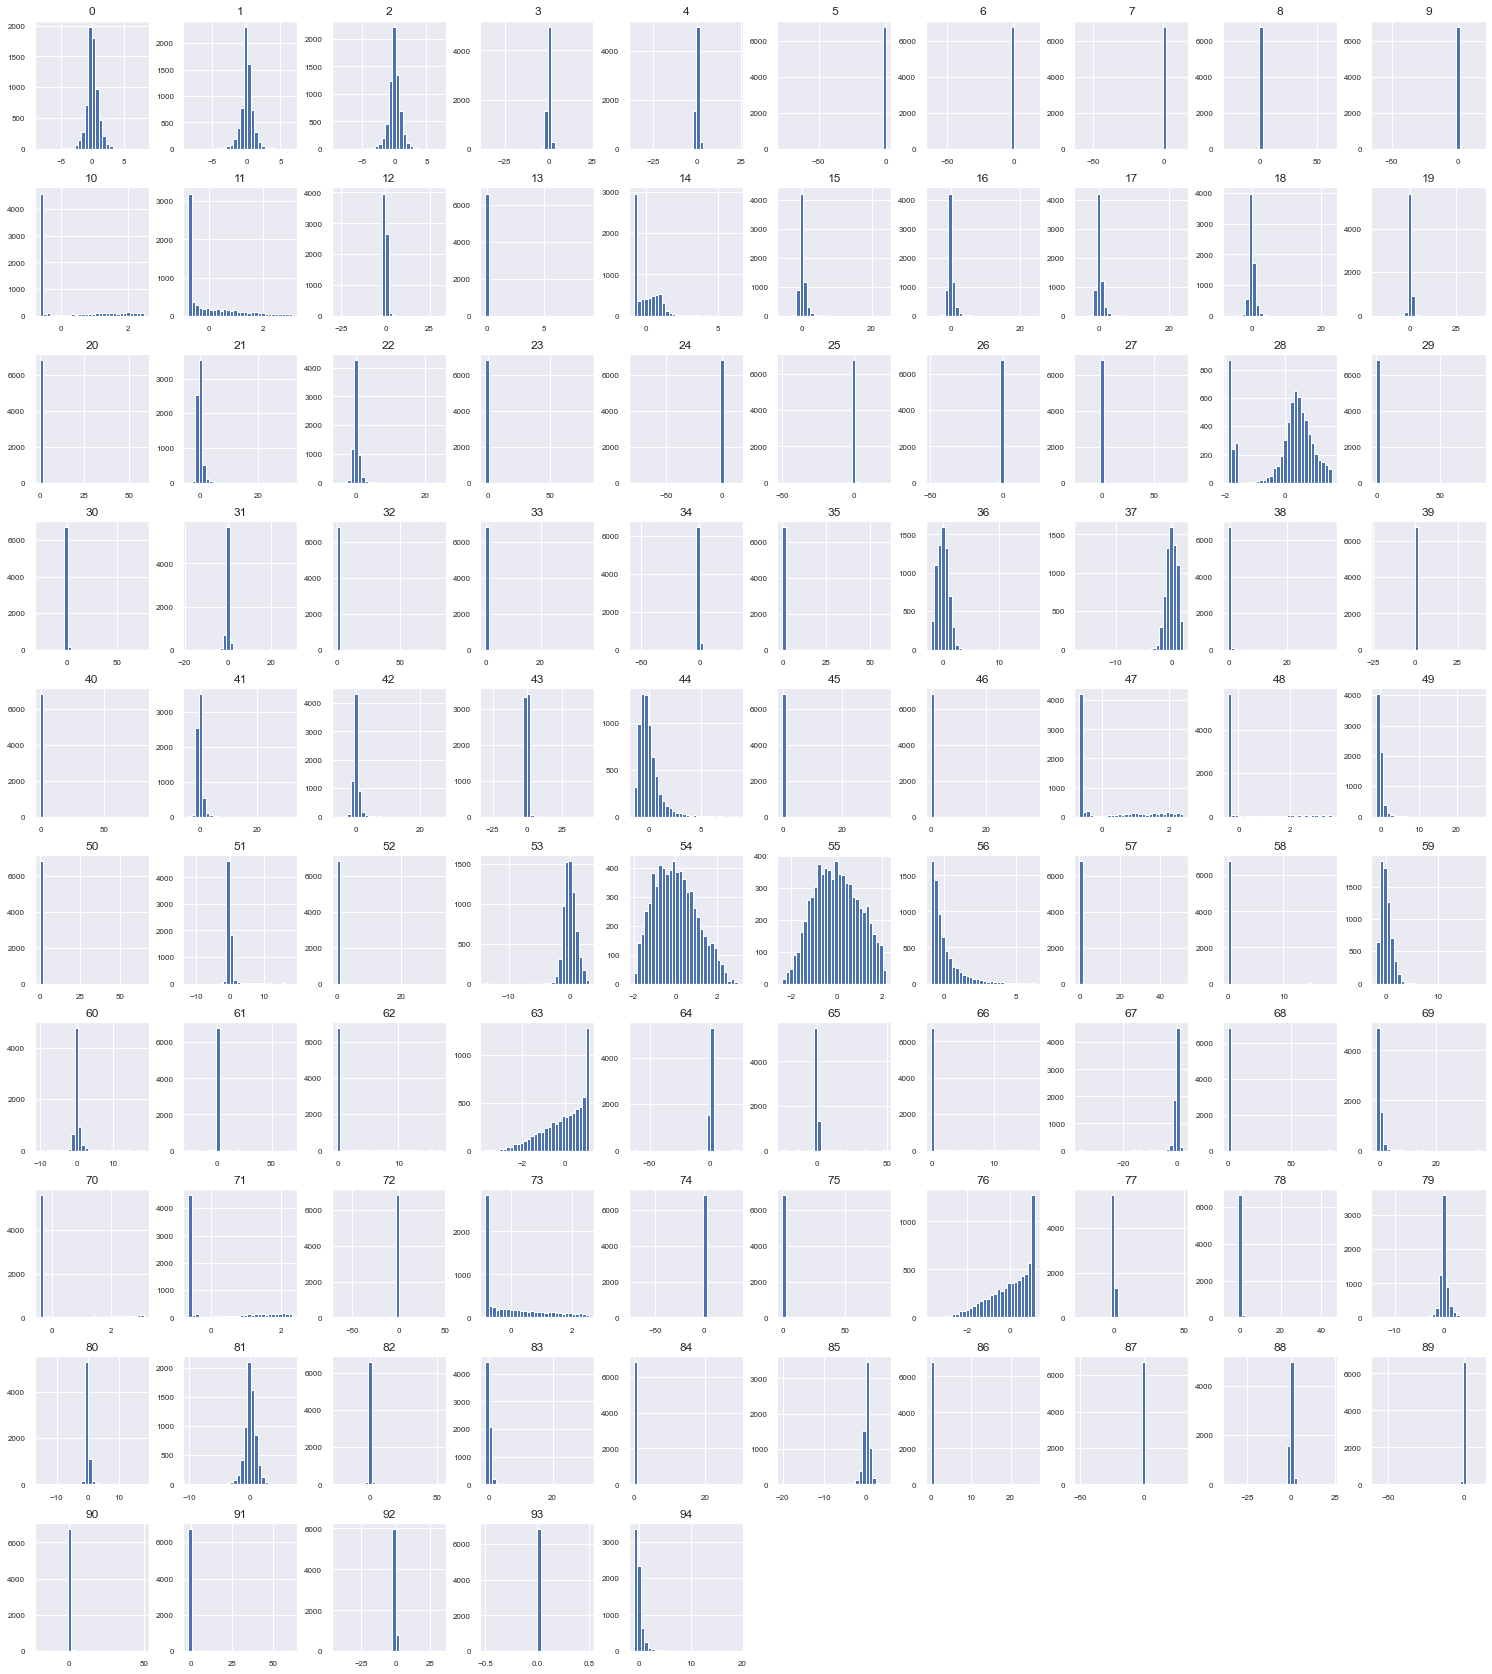

In [176]:
# Histogram of Scaled Data, just for reference
scaled_data = pd.DataFrame(x_scaled)
scaled_data.hist(figsize=(26, 30), bins=30, xlabelsize=8, ylabelsize=8); 

# Models and model evaluations

In [169]:
# SGD with logistic regression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

sgd_clf = SGDClassifier(loss='log', random_state=random_st)
sgd_clf.fit(x_train, y_train)

#cross_val_score(sgd_clf, x_train, y_train, cv=3)

cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)
#y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3, method="decision_function")

cm_mat = confusion_matrix(y_train, y_train_pred)
#ConfusionMatrixDisplay(mat).plot()
print('confusion matrix:\n', cm_mat)

print( "Accuracy: ", accuracy_score(y_train, y_train_pred) )
print( "Precision: ", precision_score(y_train, y_train_pred) )
print( "Recall: ", recall_score(y_train, y_train_pred) )
print( "F1 score train: ", f1_score(y_train, y_train_pred) )


y_test_pred = sgd_clf.predict(x_test)
#y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3, method="decision_function")

cm_mat = confusion_matrix(y_test, y_test_pred)
#ConfusionMatrixDisplay(mat).plot()
print('confusion matrix:\n', cm_mat)
print( "F1 score test: ", f1_score(y_test, y_test_pred) )



confusion matrix:
 [[5185   90]
 [ 118   62]]
Accuracy:  0.9618698441796517
Precision:  0.40789473684210525
Recall:  0.34444444444444444
F1 score train:  0.3734939759036145
confusion matrix:
 [[1298   26]
 [  29   11]]
F1 score test:  0.28571428571428575


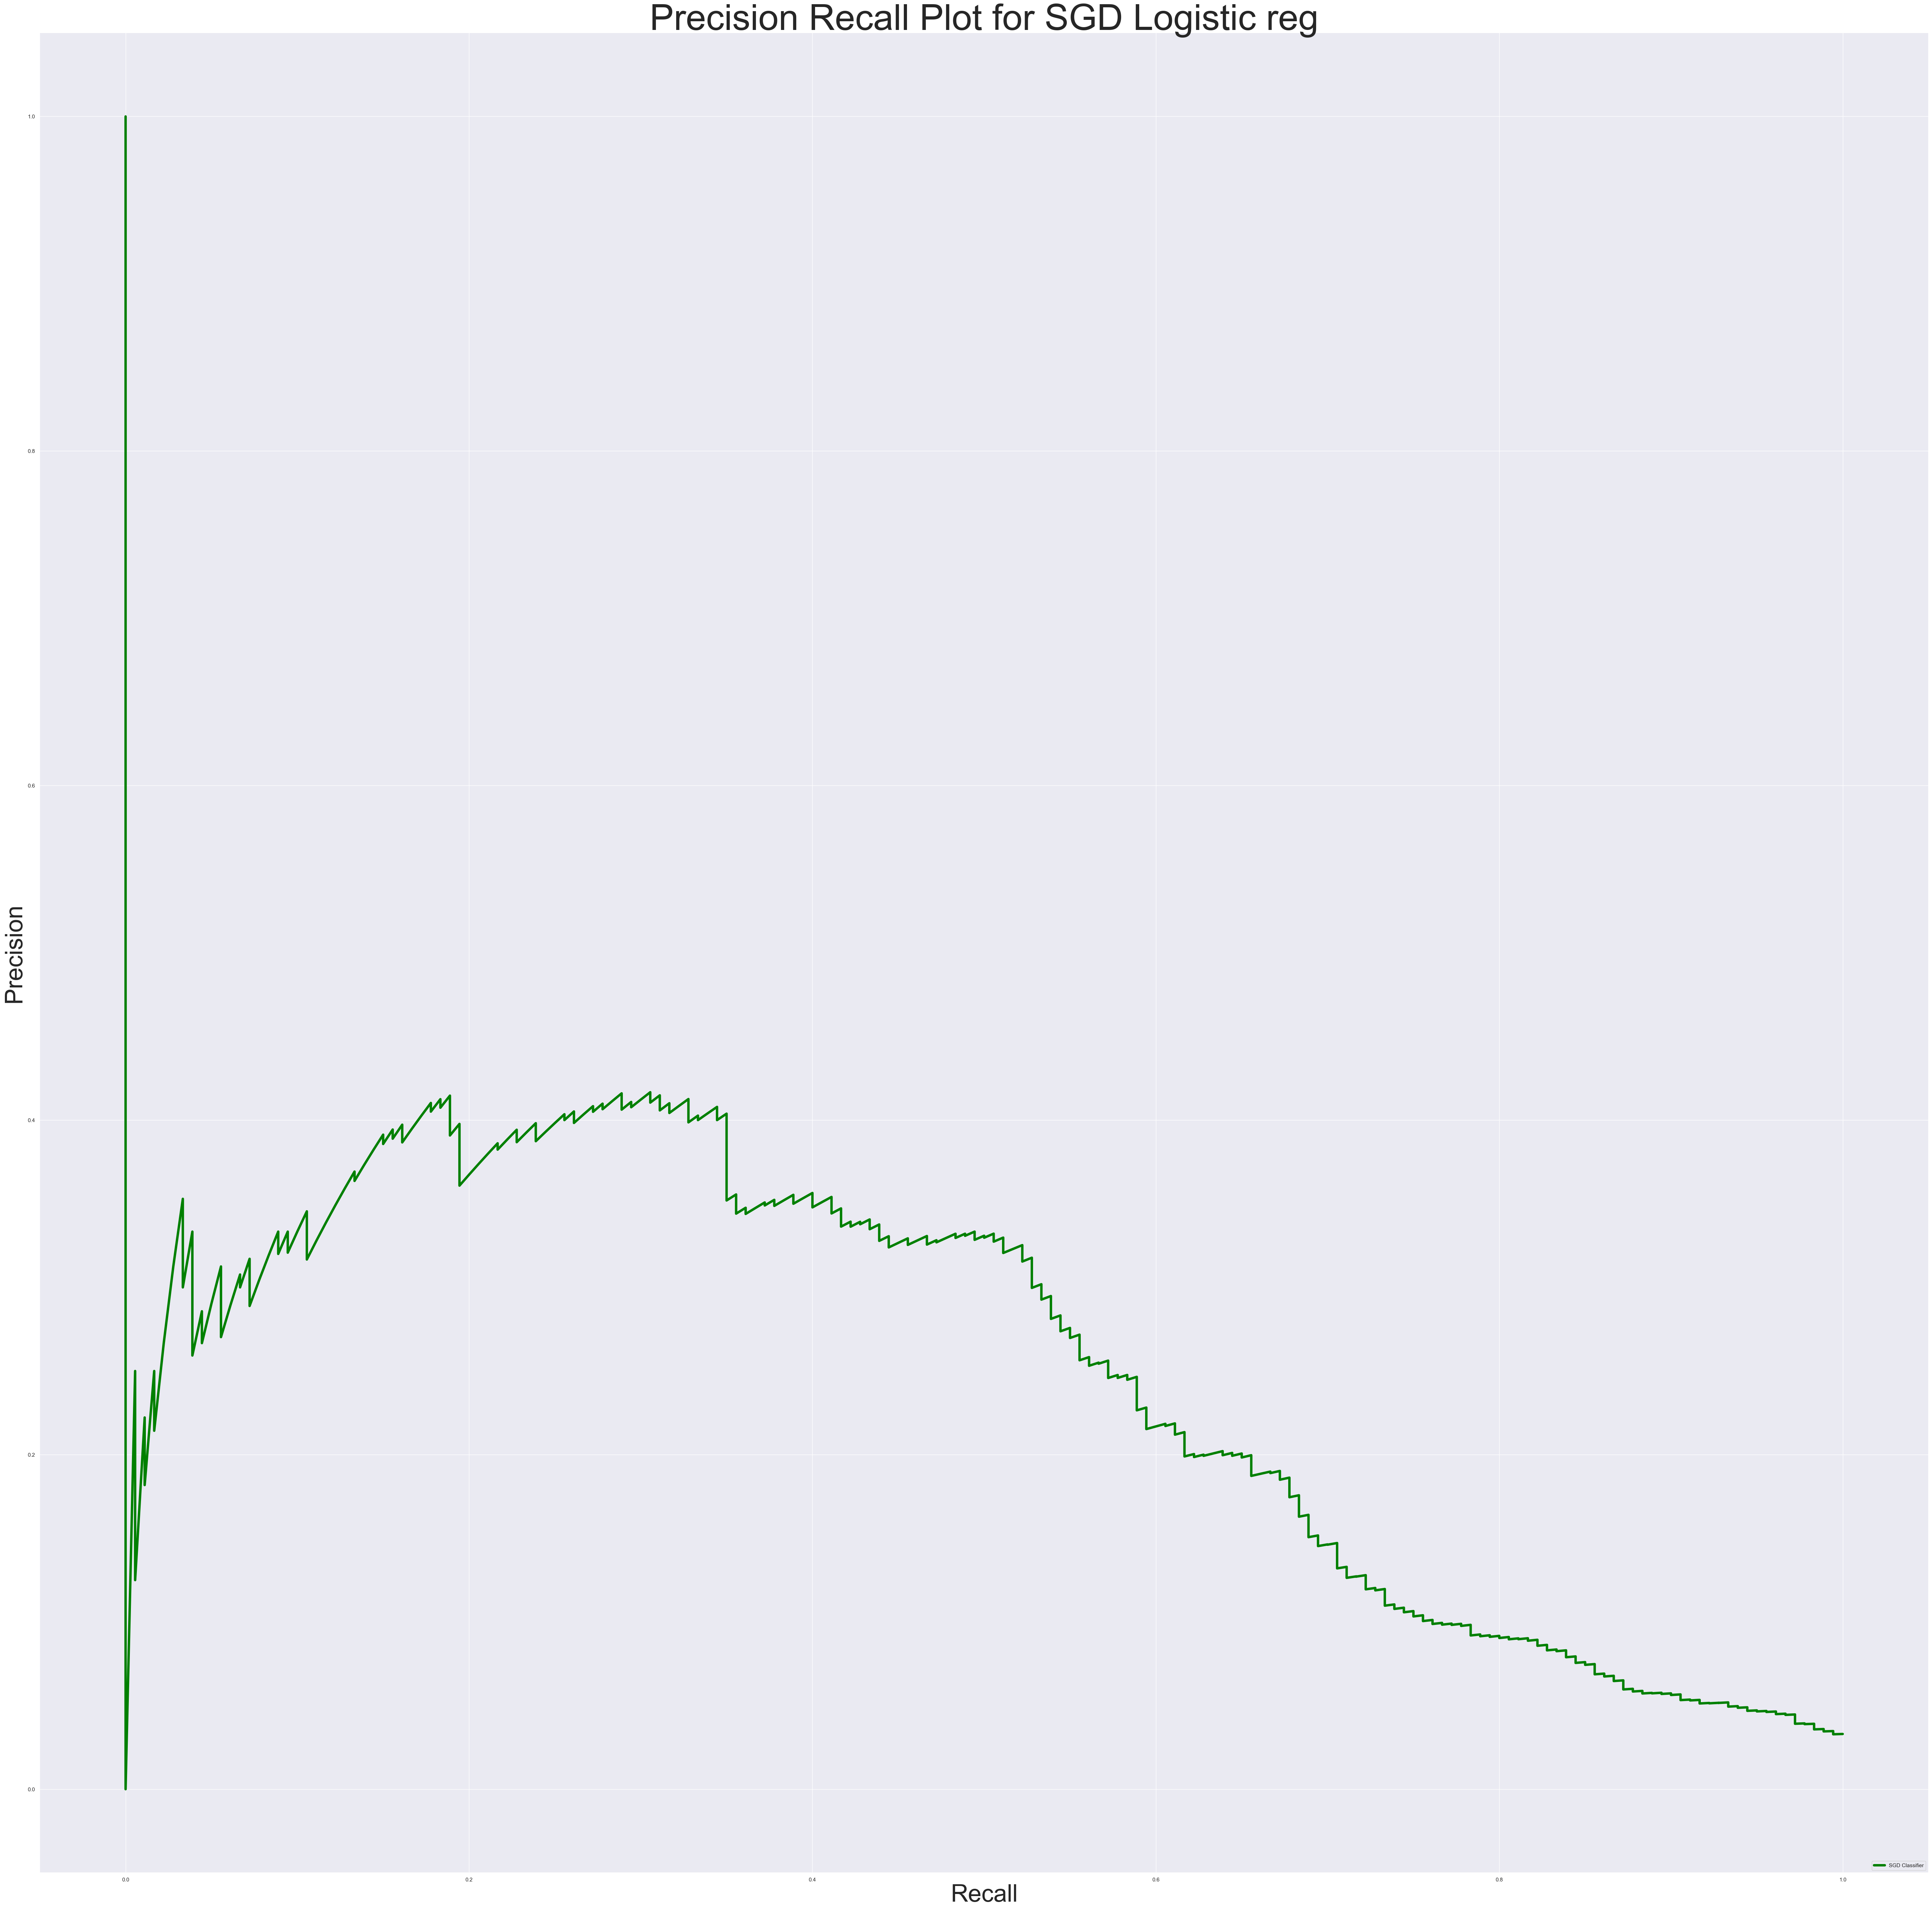

In [170]:
# Let us plot the precison reacall graph

import matplotlib.pyplot as plt


y_scores = cross_val_predict(sgd_clf, x_train, y_train, cv=3,
method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

fig = plt.figure(dpi=100, figsize=(70, 70)) 

#plt.plot(precisions, recalls, linewidth=2, label='SGD Classifier', color="green")
plt.plot(recalls, precisions, linewidth=5, label='SGD Classifier', color="green")
plt.title( 'Precision Recall Plot for SGD Logistic reg', fontsize=75)
plt.xlabel('Recall', fontsize=50)
plt.ylabel('Precision', fontsize=50)
plt.legend(loc="lower right")
plt.show()

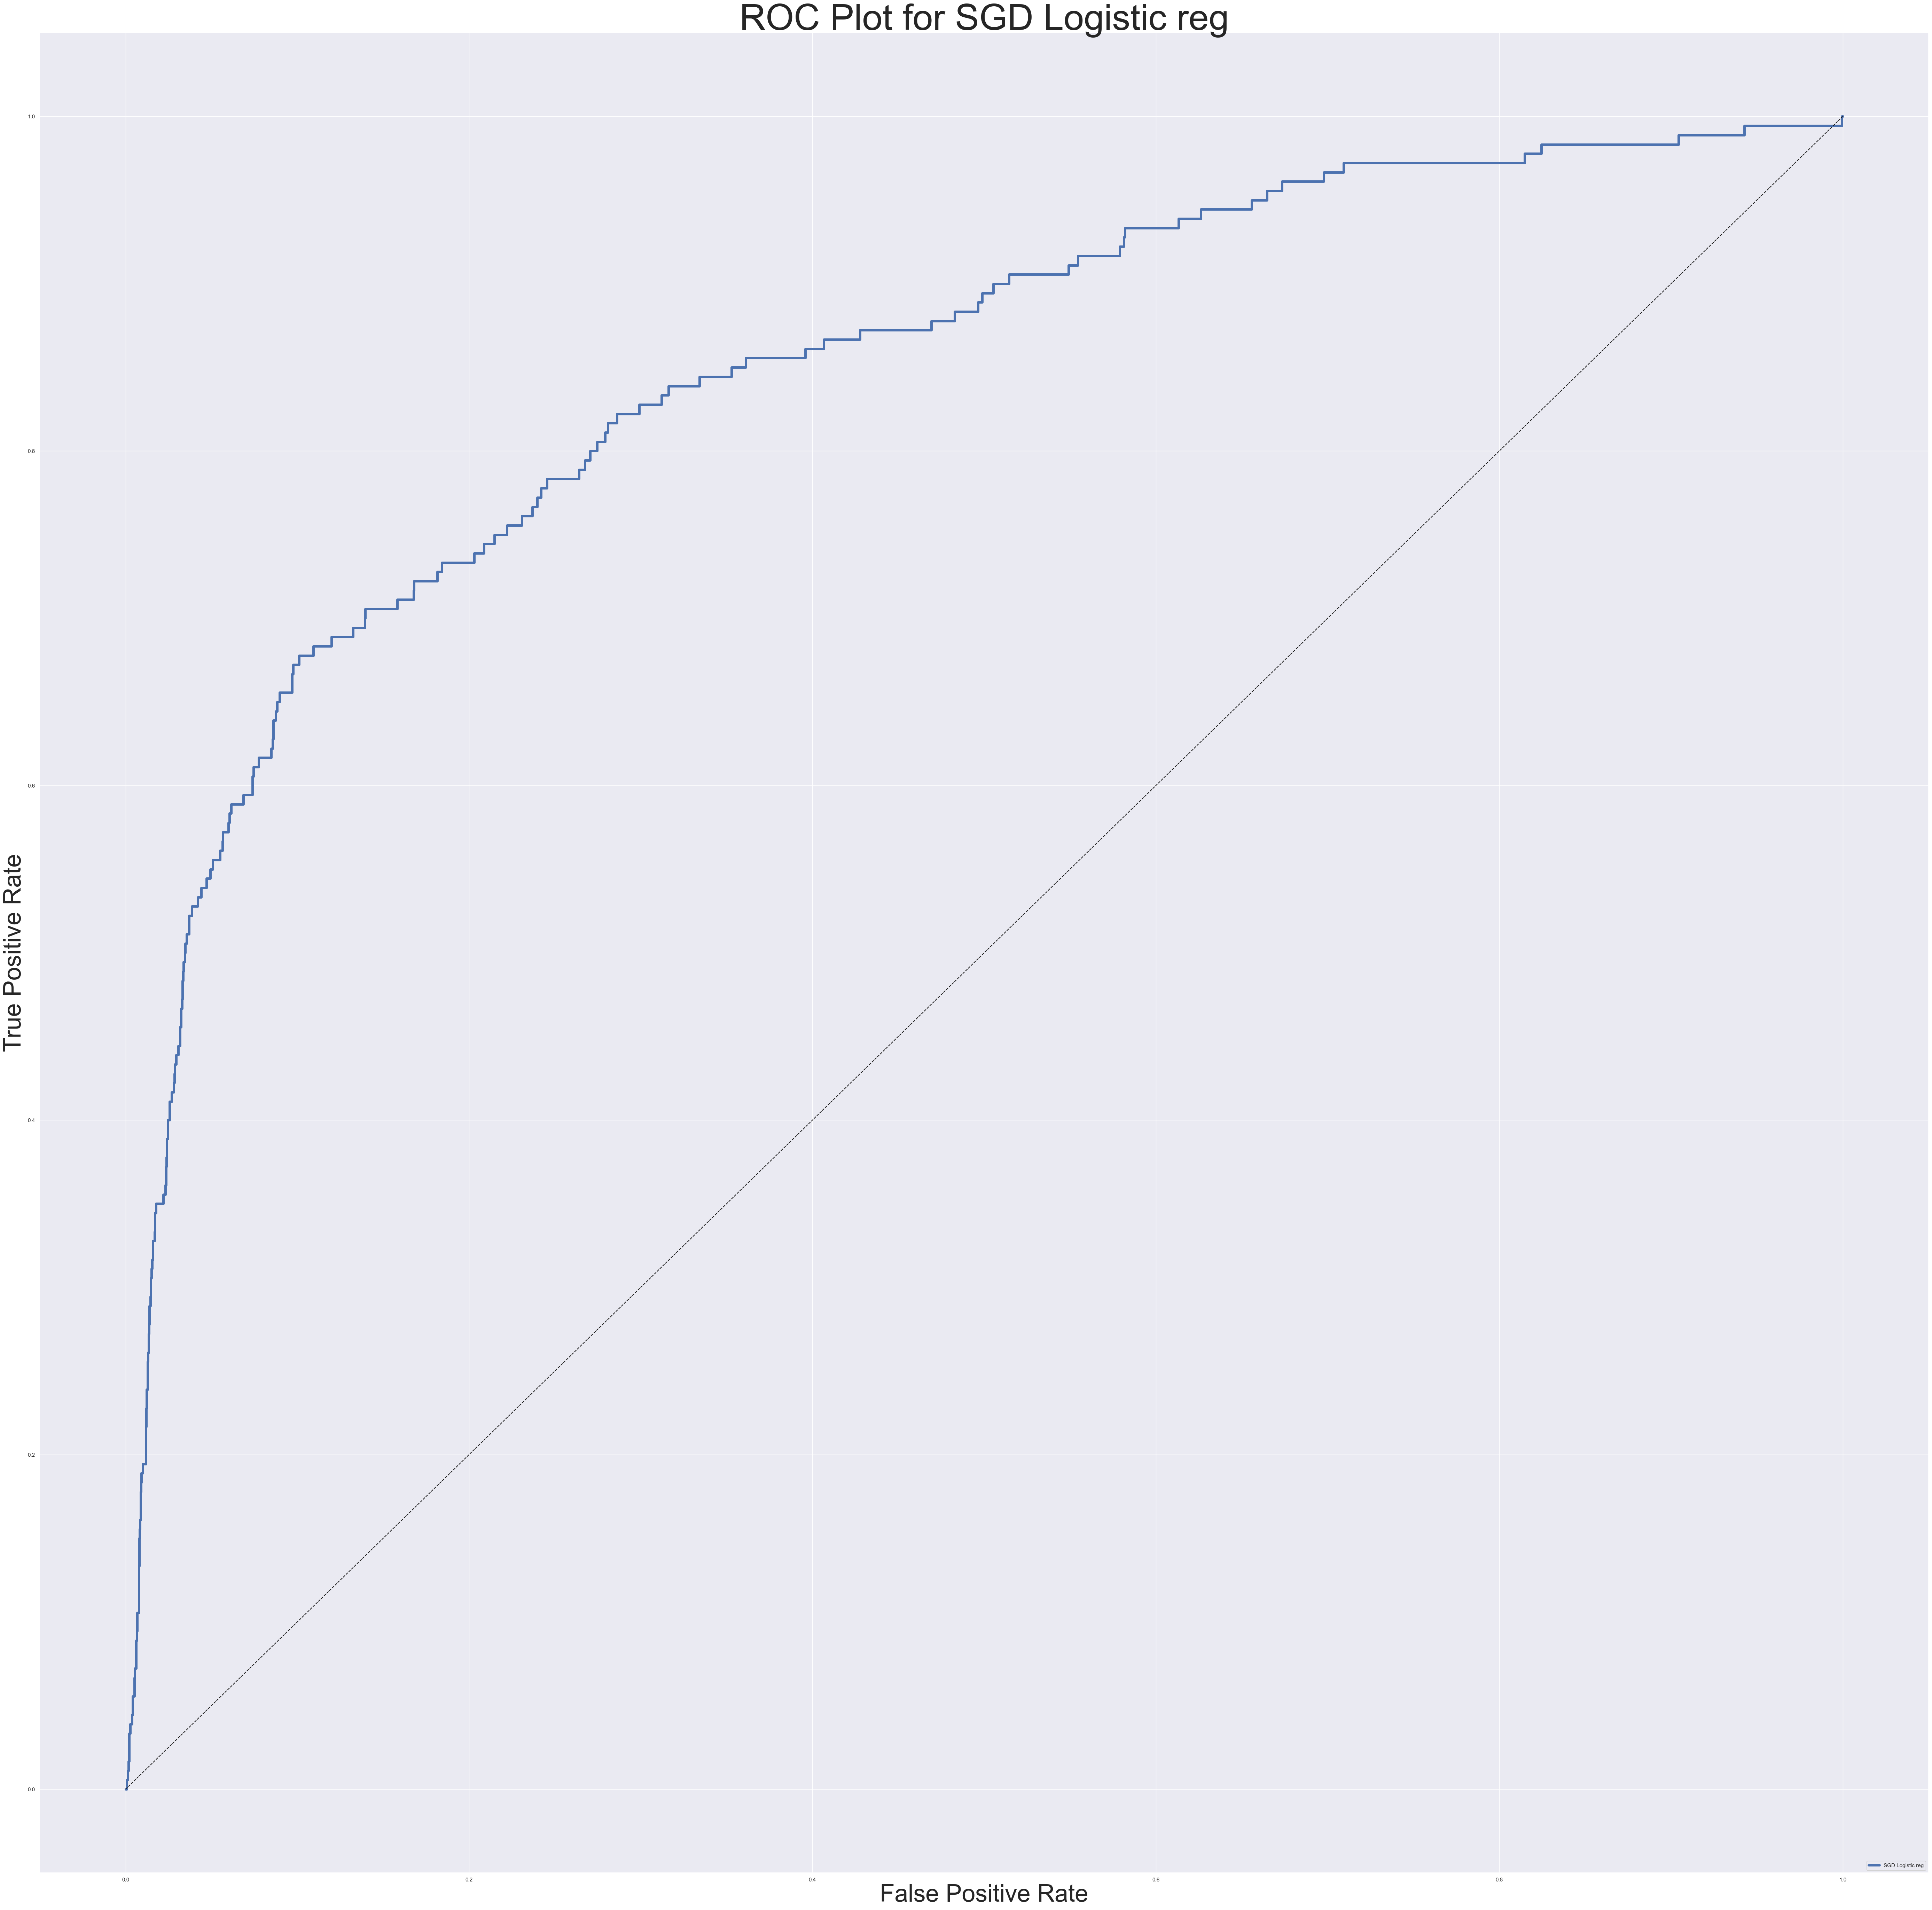

In [171]:
    
fpr, tpr, thresholds = roc_curve(y_train,y_scores)

fig = plt.figure(dpi=100, figsize=(70, 70)) #dpi=100 instead of dpi=256


#plt.plot(fr_forest, tpr_forest, "b:", label="Forrest")
plt.plot(fpr, tpr, linewidth=5, label='SGD Logistic reg')
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False Positive Rate', fontsize=50)
plt.ylabel('True Positive Rate', fontsize=50)
# show the legend
plt.legend()
#plot_roc_curve(fpr, tpr, "SGD")
plt.title( 'ROC Plot for SGD Logistic reg', fontsize=75)
plt.legend(loc="lower right")
plt.show()


In [172]:
roc_auc_score(y_train, y_scores)

0.8493617693522907

In [137]:
# Random Forest model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#lr_clf = LogisticRegression(max_iter = 10000)
#lr_clf.fit(x_train,y_train)


forest_clf = RandomForestClassifier(n_estimators=100, random_state=random_st)

cross_val_score(forest_clf, x_train, y_train, cv=3, scoring="accuracy")

y_train_pred = cross_val_predict(forest_clf, x_train, y_train, cv=3)


cm_mat = confusion_matrix(y_train, y_train_pred)
print('confusion matrix:\n', cm_mat)

print( "Accuracy: ", accuracy_score(y_train, y_train_pred) )
print( "Precision: ", precision_score(y_train, y_train_pred) )
print( "Recall: ", recall_score(y_train, y_train_pred) )
print( "F1 score: ", f1_score(y_train, y_train_pred) )

confusion matrix:
 [[5255   20]
 [ 155   25]]
Accuracy:  0.9679193400549955
Precision:  0.5555555555555556
Recall:  0.1388888888888889
F1 score:  0.22222222222222227


In [138]:
# Naive Bayes Model, the fastest model but not good scores

from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()

nb_clf.fit(x_train, y_train)

#cross_val_score(sgd_clf, x_train, y_train, cv=3)

cross_val_score(nb_clf, x_train, y_train, cv=3, scoring="accuracy")

y_train_pred = cross_val_predict(nb_clf, x_train, y_train, cv=3)
#y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3, method="decision_function")

cm_mat = confusion_matrix(y_train, y_train_pred)
#ConfusionMatrixDisplay(mat).plot()
print('confusion matrix:\n', cm_mat)

print( "Accuracy: ", accuracy_score(y_train, y_train_pred) )
print( "Precision: ", precision_score(y_train, y_train_pred) )
print( "Recall: ", recall_score(y_train, y_train_pred) )
print( "F1 score train: ", f1_score(y_train, y_train_pred) )


y_test_pred = nb_clf.predict(x_test)
#y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3, method="decision_function")

cm_mat = confusion_matrix(y_test, y_test_pred)
#ConfusionMatrixDisplay(mat).plot()
print('confusion matrix:\n', cm_mat)
print( "F1 score test: ", f1_score(y_test, y_test_pred) )


confusion matrix:
 [[1548 3727]
 [  13  167]]
Accuracy:  0.31439046746104493
Precision:  0.04288649203903441
Recall:  0.9277777777777778
F1 score train:  0.0819833087874325
confusion matrix:
 [[ 275 1049]
 [   5   35]]
F1 score test:  0.06227758007117438


In [83]:
# SVM Model  

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

#svm_clf = SVC(kernel = 'rbf', C = 100)

svm_clf = LinearSVC(C=100, loss="hinge")

# The data is already scaled 
#svm_clf = Pipeline([
#("scaler", StandardScaler()),
#("linear_svc", LinearSVC(C=1, loss="hinge")),
#])

svm_clf.fit(x_train, y_train)

cross_val_score(svm_clf, x_train, y_train, cv=3, scoring="accuracy")

y_train_pred = cross_val_predict(svm_clf, x_train, y_train, cv=3)
#y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3, method="decision_function")

cm_mat = confusion_matrix(y_train, y_train_pred)
#ConfusionMatrixDisplay(mat).plot()
print('confusion matrix:\n', cm_mat)

print( "Accuracy: ", accuracy_score(y_train, y_train_pred) )
print( "Precision: ", precision_score(y_train, y_train_pred) )
print( "Recall: ", recall_score(y_train, y_train_pred) )
print( "F1 score train: ", f1_score(y_train, y_train_pred) )


y_test_pred = svm_clf.predict(x_test)
#y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3, method="decision_function")

cm_mat = confusion_matrix(y_test, y_test_pred)
#ConfusionMatrixDisplay(mat).plot()
print('confusion matrix:\n', cm_mat)
print( "F1 score test: ", f1_score(y_test, y_test_pred) )


confusion matrix:
 [[5211   64]
 [ 153   27]]
Accuracy:  0.9602199816681943
Precision:  0.2967032967032967
Recall:  0.15
F1 score train:  0.19926199261992622
confusion matrix:
 [[1315    9]
 [  34    6]]
F1 score test:  0.21818181818181814


In [163]:
# SVM model rbf Kernel, with Hyper Paramter Tuning 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

svm_clf = SVC(gamma="scale", random_state=random_st)

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 200)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(x_train, y_train)




Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...C=134.59917032720782, gamma=0.001330188202043307; total time=   0.3s
[CV] END ...C=134.59917032720782, gamma=0.001330188202043307; total time=   0.3s
[CV] END ...C=134.59917032720782, gamma=0.001330188202043307; total time=   0.3s
[CV] END ..C=120.63225547467422, gamma=0.0011507685170094942; total time=   0.3s
[CV] END ..C=120.63225547467422, gamma=0.0011507685170094942; total time=   0.3s
[CV] END ..C=120.63225547467422, gamma=0.0011507685170094942; total time=   0.3s
[CV] END ..C=16.819392808840572, gamma=0.0011471537279575017; total time=   0.3s
[CV] END ..C=16.819392808840572, gamma=0.0011471537279575017; total time=   0.3s
[CV] END ..C=16.819392808840572, gamma=0.0011471537279575017; total time=   0.3s
[CV] END ....C=28.396103527744575, gamma=0.06877568218302048; total time=   0.8s
[CV] END ....C=28.396103527744575, gamma=0.06877568218302048; total time=   0.8s
[CV] END ....C=28.396103527744575, gamma=0.06877

RandomizedSearchCV(cv=3, estimator=SVC(random_state=1234),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x143a90820>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x143dbd430>},
                   verbose=2)

In [164]:
rnd_search_cv.best_estimator_

SVC(C=16.819392808840572, gamma=0.0011471537279575017, random_state=1234)

In [165]:
rnd_search_cv.best_estimator_.fit(x_train, y_train)

y_train_pred = rnd_search_cv.best_estimator_.predict(x_train)
cm_mat = confusion_matrix(y_train, y_train_pred)
print('confusion matrix:\n', cm_mat)
print( "Accuracy: ", accuracy_score(y_train, y_train_pred) )
print( "Precision: ", precision_score(y_train, y_train_pred) )
print( "Recall: ", recall_score(y_train, y_train_pred) )
print( "F1 score train: ", f1_score(y_train, y_train_pred) )



y_test_pred = rnd_search_cv.best_estimator_.predict(x_test)
cm_mat = confusion_matrix(y_test, y_test_pred)
print('confusion matrix:\n', cm_mat)
print( "F1 score test: ", f1_score(y_test, y_test_pred) )





confusion matrix:
 [[5274    1]
 [ 155   25]]
Accuracy:  0.9714023831347388
Precision:  0.9615384615384616
Recall:  0.1388888888888889
F1 score train:  0.24271844660194172
confusion matrix:
 [[1322    2]
 [  38    2]]
F1 score test:  0.09090909090909091


In [166]:
y_scores = cross_val_predict(rnd_search_cv.best_estimator_, x_train, y_train, cv=3,
method="decision_function")


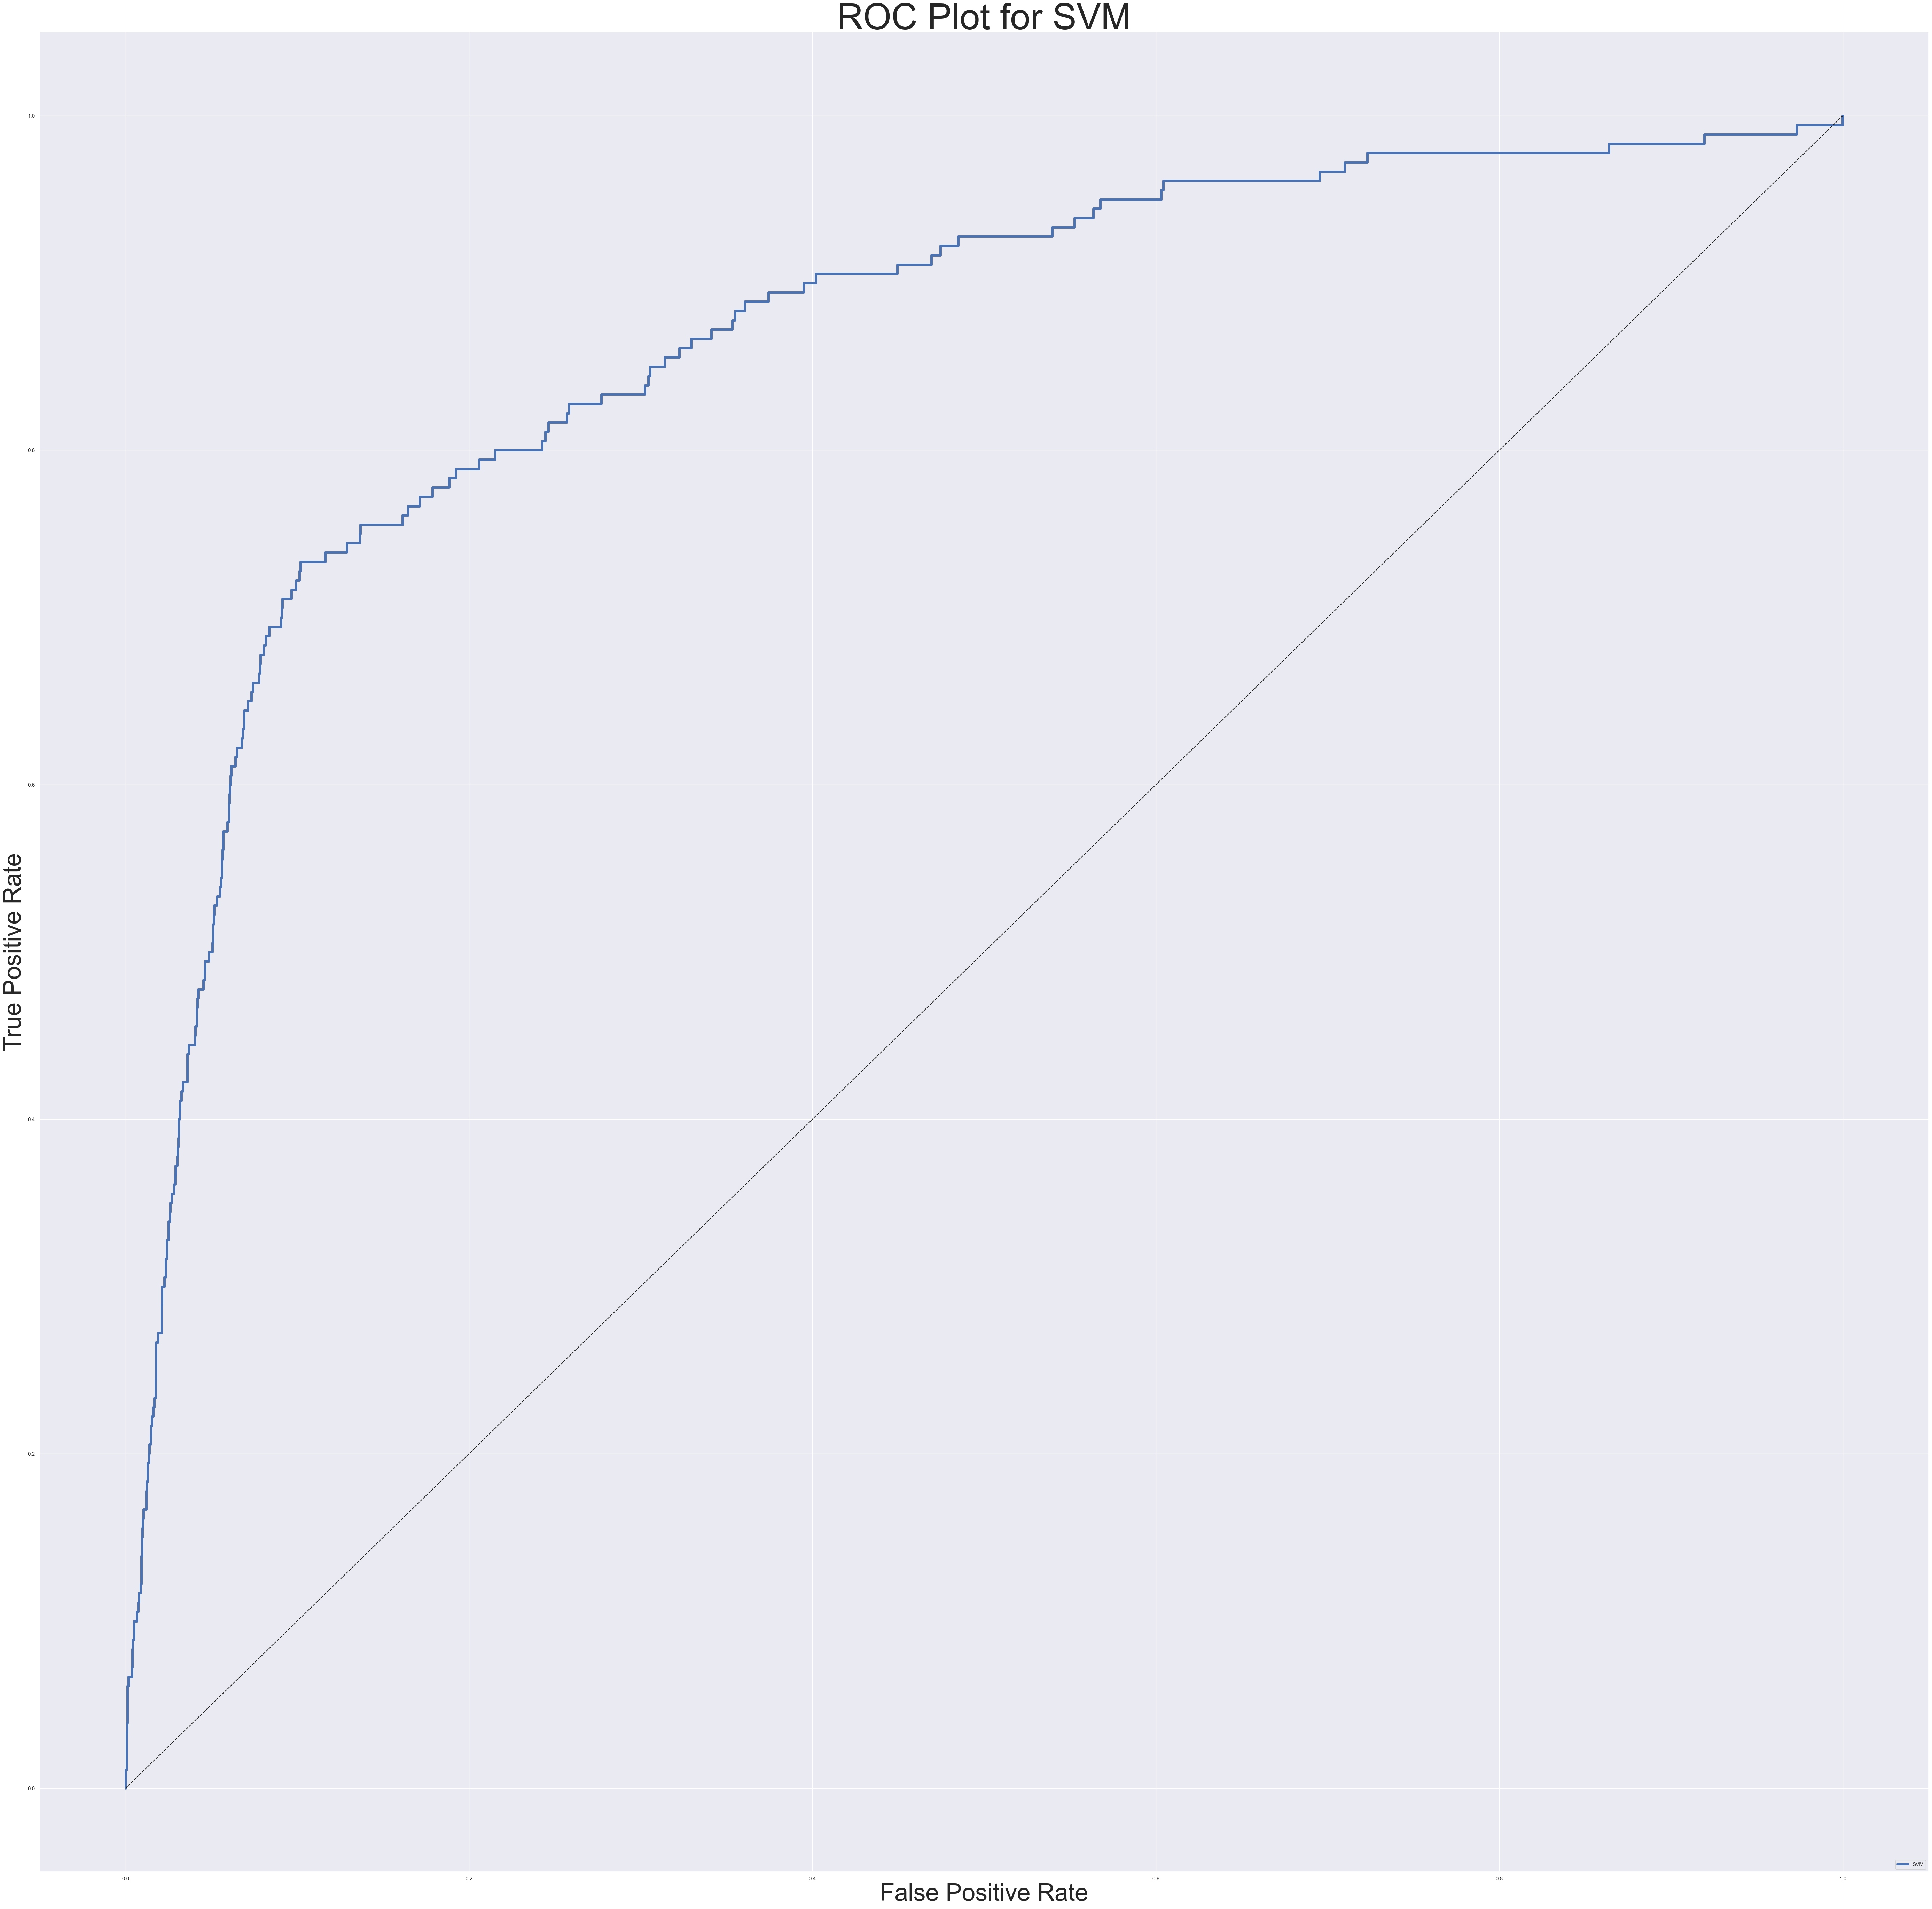

In [168]:
fpr, tpr, thresholds = roc_curve(y_train,y_scores)

fig = plt.figure(dpi=100, figsize=(70, 70)) 

plt.plot(fpr, tpr, linewidth=5, label='SVM')
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False Positive Rate', fontsize=50)
plt.ylabel('True Positive Rate', fontsize=50)
# show the legend
plt.legend()
#plot_roc_curve(fpr, tpr, "SGD")
plt.title( 'ROC Plot for SVM', fontsize=75)
plt.legend(loc="lower right")
plt.show()

In [167]:
roc_auc_score(y_train, y_scores)

0.8677640863612427

In [ ]:
Are under curve is 0.87, which is a relatively good score, could be imroved.